<a href="https://colab.research.google.com/github/Shobeca433/Face-Corner-Detection/blob/main/Face_%26_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Face Detection***

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

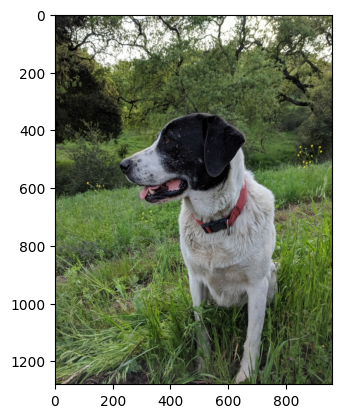

In [ ]:
full = cv2.imread('image 2.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)


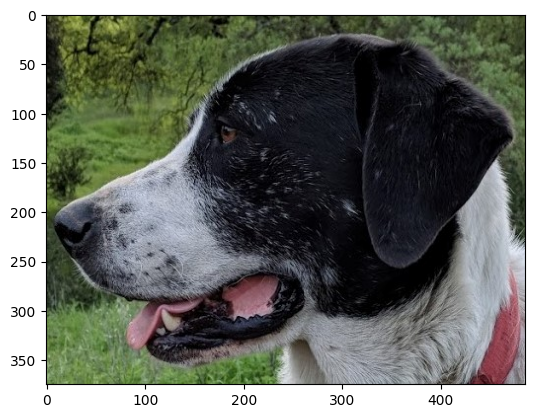

In [ ]:
face = cv2.imread('image1.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)


In [ ]:
sum([1,2,3])
mystring = 'sum'
myfunc = eval(mystring)
myfunc([1,2,3])

6

In [ ]:
height, width, channels = face.shape

In [ ]:
full = cv2.imread('image 2.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

face = cv2.imread('image1.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


In [ ]:
for m in methods:
  full_copy = full.copy()
  method = eval(m)
  res = cv2.matchTemplate(full_copy, face, method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
  top_left = min_loc
else:
  top_left = max_loc
bottom_right = (top_left[0] + width,top_left[1]+ height)
cv2.rectangle(full_copy, top_left, bottom_right, 255, 0,0,5)

array([[[ 42,  46,  45],
        [ 31,  35,  34],
        [ 37,  41,  40],
        ...,
        [101, 108,  64],
        [ 72,  79,  35],
        [ 59,  66,  25]],

       [[ 38,  42,  41],
        [ 38,  42,  41],
        [ 35,  39,  38],
        ...,
        [ 84,  91,  47],
        [ 62,  69,  27],
        [ 69,  76,  35]],

       [[ 39,  43,  42],
        [ 47,  51,  50],
        [ 35,  39,  38],
        ...,
        [ 73,  80,  36],
        [ 59,  66,  24],
        [ 75,  81,  43]],

       ...,

       [[ 98, 104,  56],
        [103, 109,  61],
        [109, 115,  67],
        ...,
        [ 60,  68,  47],
        [ 67,  75,  54],
        [ 64,  73,  54]],

       [[ 87,  90,  61],
        [ 72,  75,  46],
        [ 73,  76,  47],
        ...,
        [ 50,  57,  39],
        [ 64,  71,  53],
        [ 66,  75,  58]],

       [[ 64,  65,  47],
        [ 49,  50,  32],
        [ 59,  60,  42],
        ...,
        [ 44,  51,  33],
        [ 70,  77,  59],
        [ 76,  85,  68]]

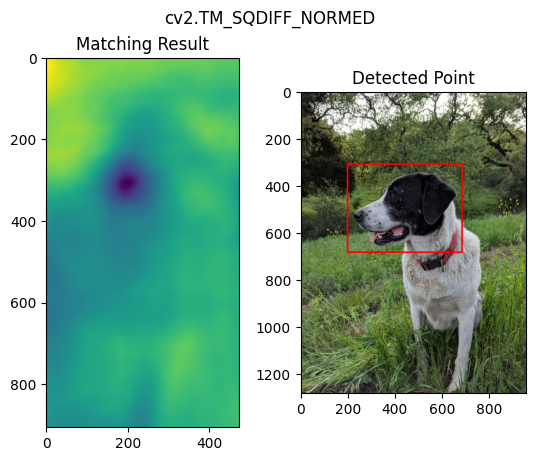

In [ ]:
cv2.rectangle(full_copy, top_left, bottom_right, 255,2)
plt.subplot(121)
plt.imshow(res)
plt.title('Matching Result')

plt.subplot(122)
plt.imshow(full_copy)
plt.title('Detected Point')
plt.suptitle(m)
plt.show()
print('\n')
print('\n')

# ***Corner Detection***

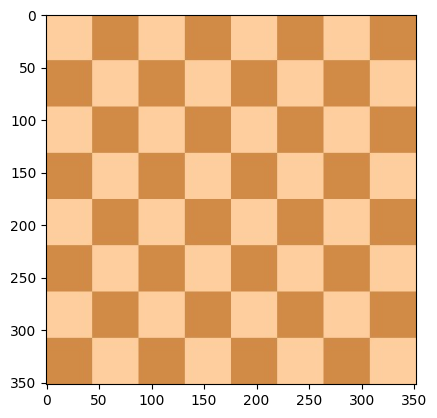

In [ ]:
flat_chess = cv2.imread('image 3.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)


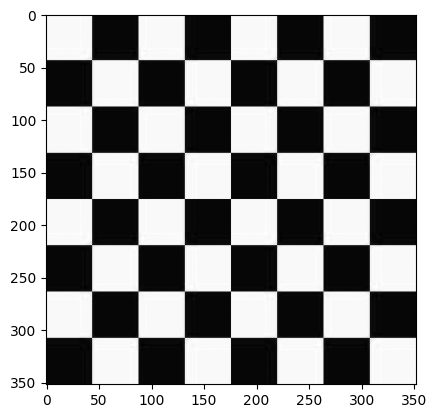

In [ ]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

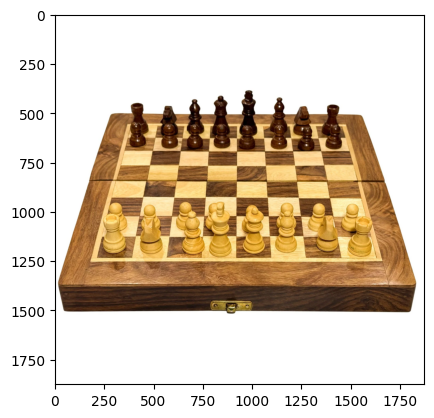

In [ ]:
real_chess = cv2.imread('real_chess_board')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

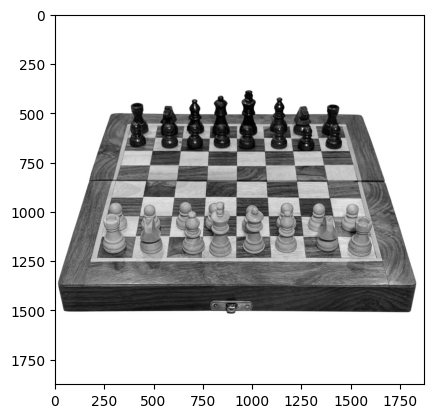

In [ ]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [ ]:
gray = np.float32(gray_flat_chess)
gray


array([[197., 197., 197., ..., 126., 126., 126.],
       [197., 197., 197., ..., 126., 126., 126.],
       [197., 197., 197., ..., 126., 126., 126.],
       ...,
       [126., 126., 126., ..., 197., 197., 197.],
       [126., 126., 126., ..., 197., 197., 197.],
       [126., 126., 126., ..., 197., 197., 197.]], dtype=float32)

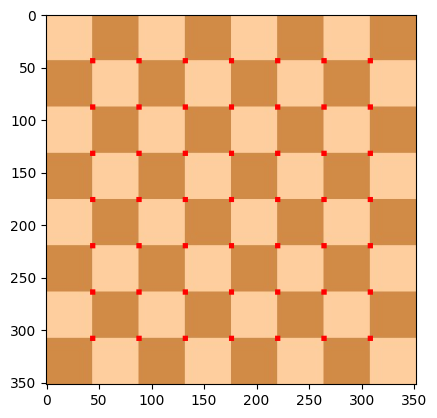

In [ ]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
flat_chess_with_corners = flat_chess.copy()
flat_chess_with_corners[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(flat_chess_with_corners)

In [ ]:
gray = np.float32(gray_real_chess)
gray

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

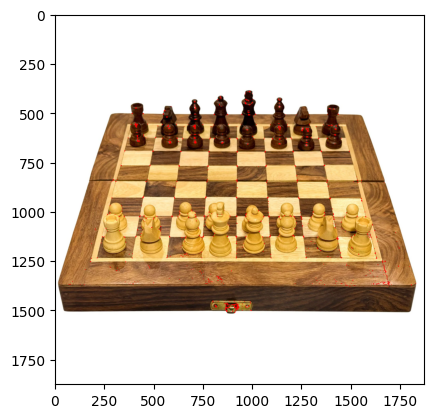

In [ ]:
dst = cv2.cornerHarris(src=gray, blockSize=2,ksize= 3,k= 0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(real_chess)